In [1197]:
## Import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


In [1198]:
# Ignore the warnings
warnings.filterwarnings(action="ignore")

# Read data from loan.csv
loanDataframe = pd.read_csv("loan.csv")

# View all the columns
pd.set_option('display.max_columns',None)

# View few rows
loanDataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1199]:
## Identifying dimension of dataframe
loanDataframe.shape

(39717, 111)

In [1200]:
# Missing value check
loanDataframe.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [1201]:
# Checking percentage of missing values
loanDataframe.isnull().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [1202]:
# Drop all columns which are completely null
loanDataframe.dropna(axis=1, how="all", inplace=True)
loanDataframe


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [1203]:
# Checking number of unique values in columns
no_of_unique_values_in_columns = loanDataframe.nunique().sort_values()
no_of_unique_values_in_columns

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [1204]:
# Identifying single valued columns
single_valued_columns = no_of_unique_values_in_columns[no_of_unique_values_in_columns.values==1]
single_valued_columns

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
dtype: int64

In [1205]:
# Removing the single valued columns as they cannot contribute in our analysis
loanDataframe.drop(columns = list(single_valued_columns.index), inplace = True)

In [1206]:
# Identifying dimension of dataframe
loanDataframe.shape

(39717, 48)

In [1207]:
# Removing columns that are not relevant for analysis
# 'id','member_id' are unique values and will not contribute in analysis
# 'emp_title','url','addr_state','desc' are random variables and cannot be used for analysis
# 'zip_code' is masked hence cannot be used as input for analysis
#'out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv', "total_rec_prncp","total_rec_int","total_rec_late_fee" - These are customer behaviour variables and will not contribute in analysis
# "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d - These are customer behaviour variables and will not contribute in analysis

loanDataframe.drop(columns = ['id','member_id','emp_title','url','title','zip_code','addr_state','desc','funded_amnt','out_prncp',
                        'out_prncp_inv', 'total_pymnt','total_pymnt_inv', "total_rec_prncp","total_rec_int","total_rec_late_fee",
                        "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"],inplace = True)

In [1208]:
# Identifying dimension of dataframe
loanDataframe.shape

(39717, 27)

In [1209]:
# Columns in dataframe
loanDataframe.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'next_pymnt_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1210]:
# Different loan statuses
loanDataframe['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [1211]:
# Removing loans with status as current as it will not contribute in analysis 
loanDataframe = loanDataframe[loanDataframe['loan_status'] != 'Current']
loanDataframe.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [1212]:
# Identifying dimension of dataframe
loanDataframe.shape

(38577, 27)

In [1213]:
# Count of 'Fully Paid', 'Charged Off' loans
loanDataframe['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [1214]:
# Identifying average percentage of missing values
loanDataframe.isnull().mean()*100

loan_amnt                   0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.559193
mths_since_last_record     92.897322
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.129611
total_acc                   0.000000
next_pymnt_d              100.000000
pub_rec_bankruptcies        1.806776
d

In [1215]:
# There are 3 columns namely 'next_pymnt_d','mths_since_last_record' and 'mths_since_last_delinq' 
# that have missing values more than 50%, so we can remove these columns
loanDataframe.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],inplace = True)
loanDataframe.shape

(38577, 24)

In [1216]:
# Check the null values greater than 0
null_values = loanDataframe.isnull().sum()
null_values[null_values > 0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [1217]:
# There are 3 columns emp_length(2.67), revol_util(0.129) and pub_rec_bankruptcies(1.806) which have very less
#  % of missing values, hence we can remove the rows with missing values and it will not impact the analysis
loanDataframe.dropna(subset= ['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [1218]:
# Identifying again average percentage of missing values
loanDataframe.isnull().mean()*100

# We have cleaned the data as there are 0 average percentage of missing values

loan_amnt               0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [1219]:
# Identifying dimension of dataframe
loanDataframe.shape

(36800, 24)

In [1220]:
# Remove duplicate rows from dataframe
loanDataframe = loanDataframe.drop_duplicates()

# Dimension of dataframe
loanDataframe.shape

(36800, 24)

In [1221]:
# Checking info of dataframe
loanDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt_inv       36800 non-null  float64
 2   term                  36800 non-null  object 
 3   int_rate              36800 non-null  object 
 4   installment           36800 non-null  float64
 5   grade                 36800 non-null  object 
 6   sub_grade             36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  object 
 13  purpose               36800 non-null  object 
 14  dti                   36800 non-null  float64
 15  delinq_2yrs           36

In [1222]:
# Correcting data type and format of columns and deriving columns

# Removing ' months' from 'term' column and converting it to int  
loanDataframe.term = loanDataframe.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

# Removing '%' from 'int_rate' column and converting it to float
loanDataframe.int_rate = loanDataframe.int_rate.apply(lambda x: float(x.replace('%',''))).astype(float).round(2)

# Converting categorical column 'grade' to categorical data type
loanDataframe.grade = loanDataframe.grade.astype('category')

# Converting categorical column 'sub_grade' to categorical data type
loanDataframe.sub_grade = loanDataframe.sub_grade.astype('category')

# Formatting categorical column 'emp_length' as per needs
loanDataframe.emp_length = loanDataframe.emp_length.apply(lambda x: int(x.replace('< 1','0').replace('10+','10').replace(' years','').replace(' year',''))).astype(int)

# Converting categorical column 'home_ownership' to categorical data type
loanDataframe.home_ownership=loanDataframe.home_ownership.astype('category')

# Converting categorical column 'verification_status' to categorical data type
loanDataframe.verification_status=loanDataframe.verification_status.astype('category')

# Formatting 'issue_d' column and deriving new columns
loanDataframe.issue_d = pd.to_datetime(loanDataframe.issue_d,format='%b-%y')
loanDataframe['issue_year'] = loanDataframe.issue_d.dt.year
loanDataframe['issue_month'] = loanDataframe.issue_d.dt.month

# Converting categorical column 'loan_status' to categorical data type
loanDataframe.loan_status=loanDataframe.loan_status.astype('category')

# Converting categorical column 'purpose' to categorical data type
loanDataframe.purpose=loanDataframe.purpose.astype('category')

# Removing '%' from 'revol_util' column and converting it to float
loanDataframe.revol_util = loanDataframe.revol_util.apply(lambda x: float(x.replace('%',''))).astype(float).round(2)

# Formatting 'earliest_cr_line' column and deriving new columns
loanDataframe.earliest_cr_line = pd.to_datetime(loanDataframe.earliest_cr_line, format='%b-%y')
loanDataframe['earliest_cr_line_year'] = loanDataframe.earliest_cr_line.dt.year

In [1223]:
# We have standardized the values, checking info of dataframe
loanDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_amnt              36800 non-null  int64         
 1   funded_amnt_inv        36800 non-null  float64       
 2   term                   36800 non-null  int32         
 3   int_rate               36800 non-null  float64       
 4   installment            36800 non-null  float64       
 5   grade                  36800 non-null  category      
 6   sub_grade              36800 non-null  category      
 7   emp_length             36800 non-null  int32         
 8   home_ownership         36800 non-null  category      
 9   annual_inc             36800 non-null  float64       
 10  verification_status    36800 non-null  category      
 11  issue_d                36800 non-null  datetime64[ns]
 12  loan_status            36800 non-null  category      
 13  purpos

In [1224]:
# Identifying Categorical and Continuous columns
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
continuous_columns = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'earliest_cr_line_year']


##### Handling the outliers for Continuous variables

<Axes: >

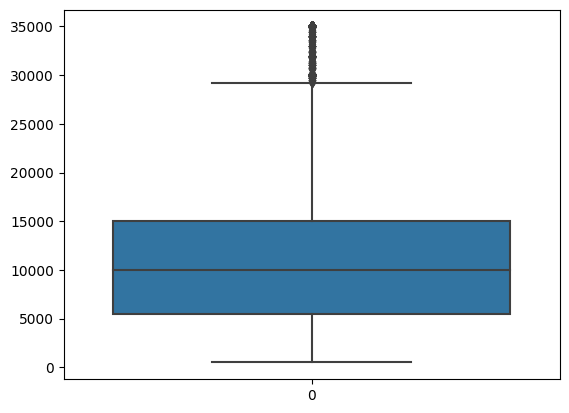

In [1225]:
# Handling outliers for 'loan_amnt'
sns.boxplot(loanDataframe.loan_amnt)

In [1226]:
# Find the Quantiles
loanDataframe.loan_amnt.quantile([0.75,0.90, 0.95, 0.97,0.98,0.982, 0.99, 1])

# The distribution seems to be continuous, hence there is no need to remove the outliers

0.750    15000.0
0.900    22000.0
0.950    25000.0
0.970    28800.0
0.980    30000.0
0.982    32000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

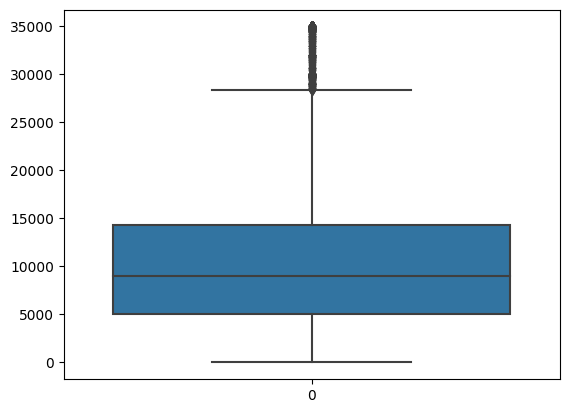

In [1227]:
# Handling outliers for 'funded_amnt_inv'
sns.boxplot(loanDataframe.funded_amnt_inv)

In [1228]:
# Find the Quantiles
loanDataframe.funded_amnt_inv.quantile([0.75,0.90, 0.95, 0.97,0.98,0.985, 0.99, 1])

# The distribution seems to be continuous, hence there is no need to remove the outliers

0.750    14350.000000
0.900    20000.000000
0.950    24655.816803
0.970    26100.750000
0.980    29950.000000
0.985    30675.000000
0.990    34725.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: >

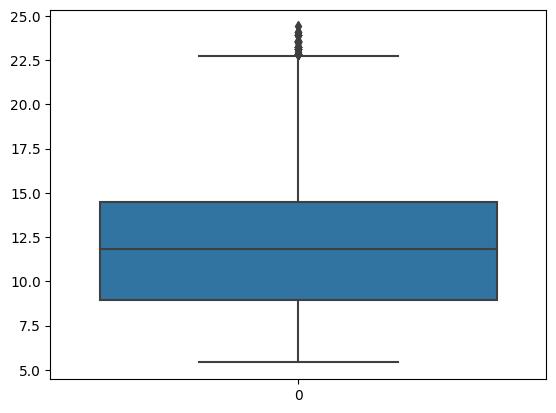

In [1229]:
# Handling outliers for 'int_rate'
sns.boxplot(loanDataframe.int_rate)

In [1230]:
# Find the Quantiles
loanDataframe.int_rate.quantile([0.75,0.90, 0.95, 0.97,0.98,0.99, 0.997,1])

# The distribution seems to be continuous, hence there is no need to remove the outliers

0.750    14.46
0.900    16.82
0.950    18.39
0.970    19.36
0.980    20.11
0.990    20.99
0.997    22.11
1.000    24.40
Name: int_rate, dtype: float64

<Axes: >

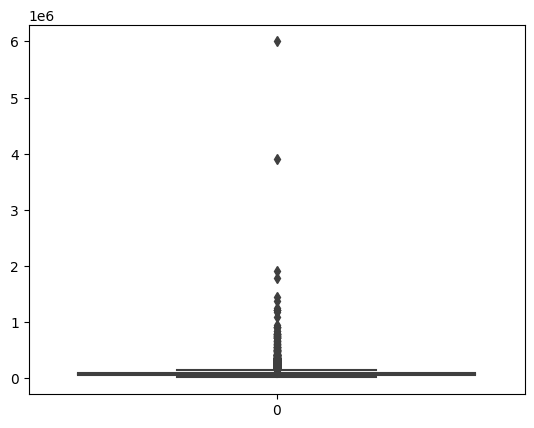

In [1231]:
# Handling outliers for 'int_rate'
sns.boxplot(loanDataframe.annual_inc)

In [1232]:
# Find the Quantiles
loanDataframe.annual_inc.quantile([0.5,0.75,0.90,0.95, 0.97,0.98,0.99,1])

# The value after 95 percentile seems disconnected so these can be removed

0.50      60000.00
0.75      83000.00
0.90     116738.90
0.95     142000.00
0.97     165996.12
0.98     188023.92
0.99     235000.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [1233]:
# Removing outliers after 95 percentile
loanDataframe = loanDataframe[loanDataframe.annual_inc <= loanDataframe.annual_inc.quantile(0.95)]
loanDataframe.annual_inc.quantile([0.5,0.75,0.90,0.95, 0.97,0.98,0.99,1])

0.50     57000.0
0.75     78000.0
0.90    100079.9
0.95    119000.0
0.97    125000.0
0.98    130000.0
0.99    135000.0
1.00    142000.0
Name: annual_inc, dtype: float64

<Axes: >

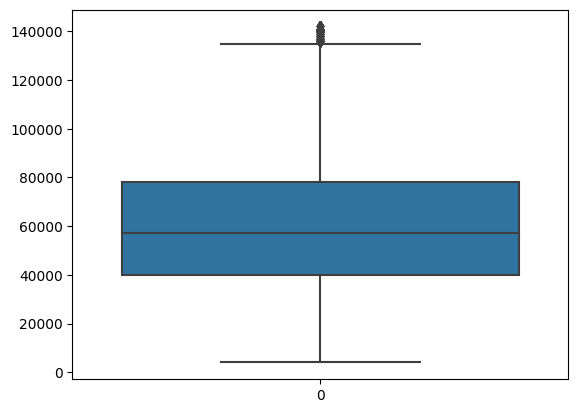

In [1234]:
# Plotting the Box plot for 'int_rate' again and now distribution looks ok
sns.boxplot(loanDataframe.annual_inc)

<Axes: >

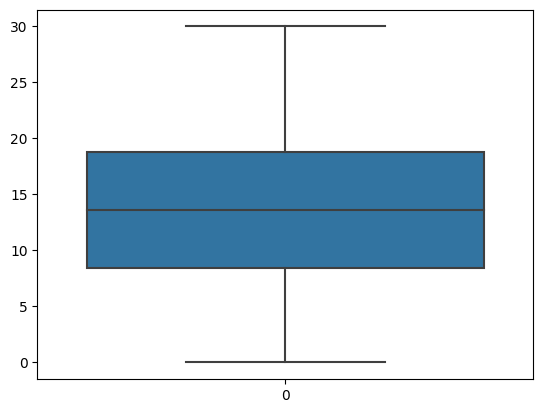

In [1084]:
# Handling outliers for 'int_rate'
sns.boxplot(loanDataframe.dti)

# The distribution seems to be continuous and there are no outliers

### Univariate Analysis

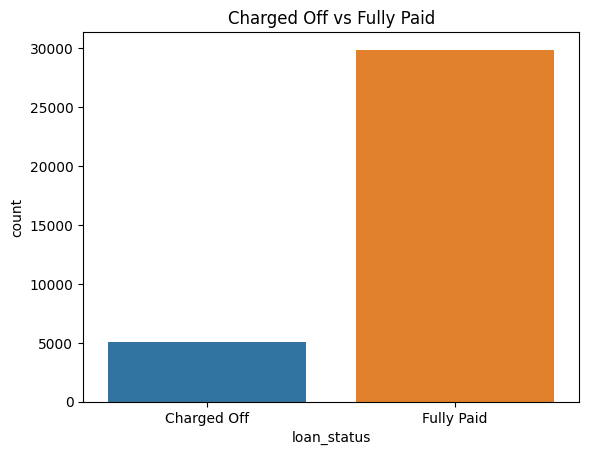

In [1250]:
# Plot for Charged Off vs Fully Paid
sns.countplot(x = 'loan_status', data = loanDataframe).set_title('Charged Off vs Fully Paid')
plt.show()

##### Charged Off (Defaulted) loans are less compared to Fully Paid loans 

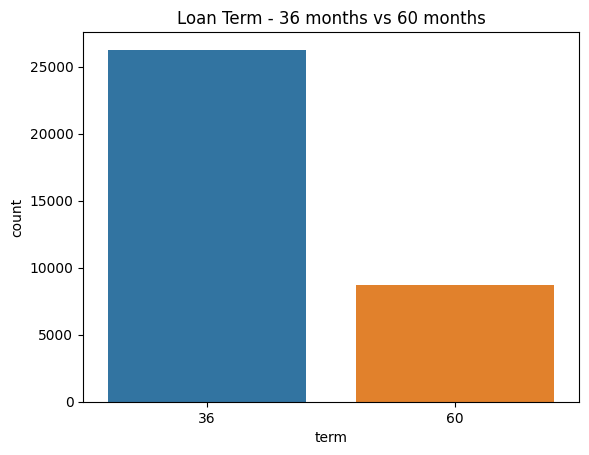

In [1254]:
# Plot for Loan Term (36 months vs 60 months)
sns.countplot(x = 'term', data = loanDataframe).set_title('Loan Term - 36 months vs 60 months')
plt.show()

##### Loans for 36 months tenure are more compared to loans for 60 months tenure 

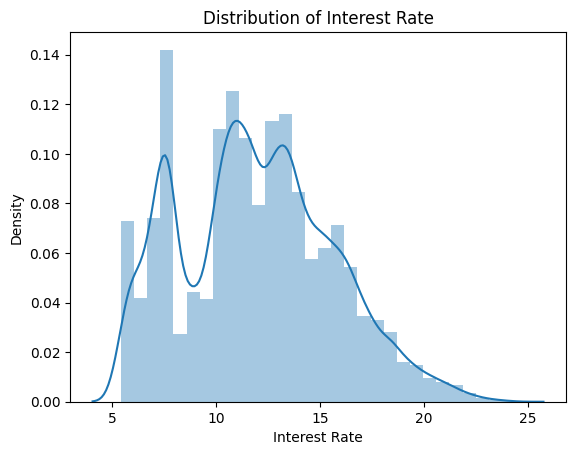

In [1265]:
# Interest rate Distribution
sns.distplot(loanDataframe.int_rate,bins=30)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

##### Looking at the distplot we can say maximum loans are given between 10 to 15

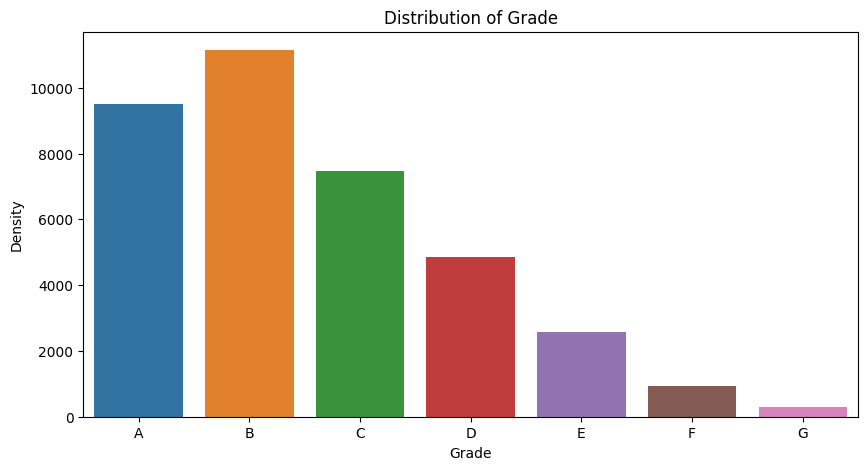

In [691]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe.grade,x=loanDataframe.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()